In [62]:
from matplotlib.pyplot import *
% matplotlib inline
from numpy import *
from astropy.io import ascii
import DragScriptV2 as DS

In [63]:
avionics = 0.211
#rocket = 4.49+0.449-0.211####mass has been adjusted
rocket = 5.0-0.211
dry_motor = 1.264 - 0.745
wet_motor = 1.264

print rocket + avionics

5.0


In [126]:
thrust_profile = 'K535_thrust.txt'
rocket_mass = avionics+rocket  #kg
time_res = 0.001
motor_mass = dry_motor
propellant_mass = wet_motor - dry_motor
burn_time = 2.8 # sec
temp = 10.   # Density of air varies with temperature


print rocket_mass + motor_mass  + propellant_mass
print rocket_mass + motor_mass

max_deploy = 41.22  #percentage opening


t_deploy = 1 #how long it takes to deploy
t_start = 1 # after MECO

drag_f = 1.25


6.264
5.519


MECO at 2.8 sec, at 329.07 m
Apogee at 17.89 sec, at 1609.34 m
MECO at 198.68 m/s


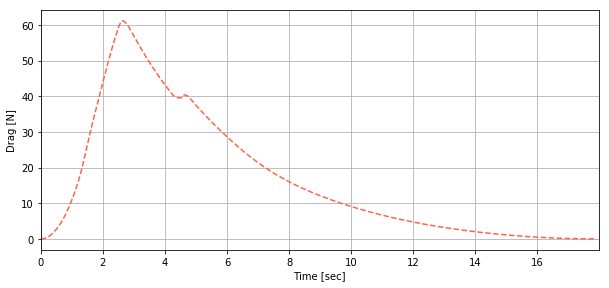

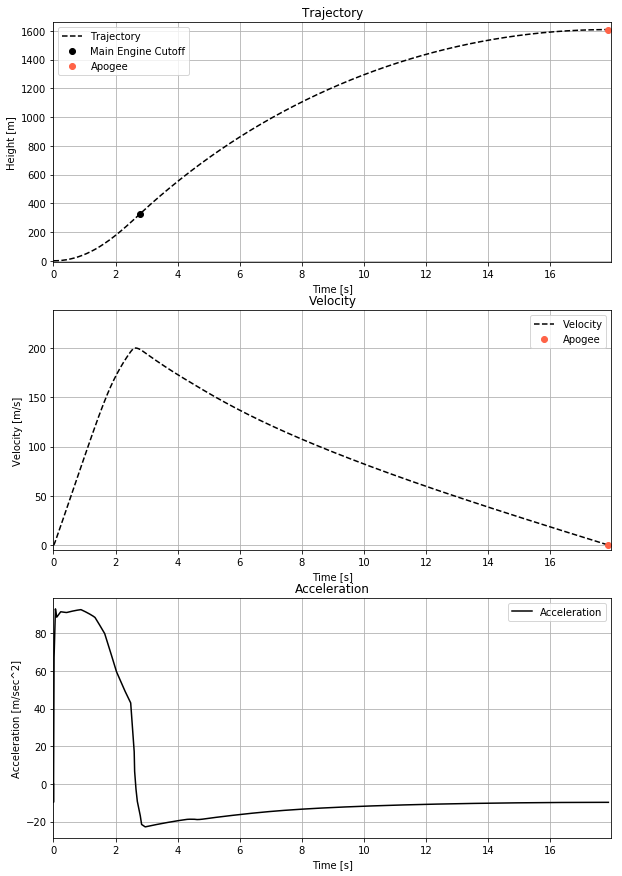

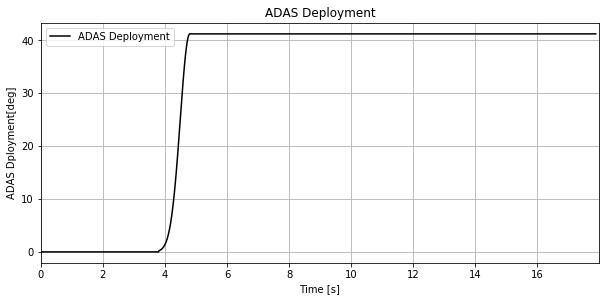

In [127]:
time, velocity, acceleration, height, mass, ADAS, apogee, MECO_vel, MECO_index = DS.num_solver(thrust_profile, rocket_mass, motor_mass, propellant_mass, time_res, temp, burn_time, max_deploy, t_start, t_deploy, 1, drag_f)

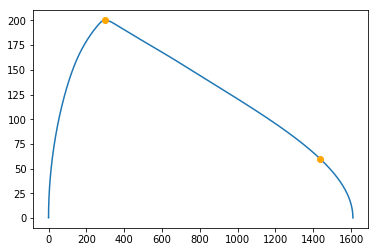

In [128]:
figure()

top_index = velocity.index(max(velocity))
near_top = 12000

plot (height, velocity)
plot (height[top_index], velocity[top_index], 'o', color = 'orange')
plot (height[near_top], velocity[near_top], 'o', color = 'orange')

In [129]:
new_height = [] #new array not of arrays
new_velocity = []
for i in range (0, len(height)-1):
    if type(height[i]) == float:
        new_height.append(height[i])
    if type(height[i]) == ndarray:
        new_height.append(height[i][0])
        
for i in range (0, len(velocity)-1):
    if type(velocity[i]) == float:
        new_velocity.append(velocity[i])
    if type(velocity[i]) == ndarray:
        new_velocity.append(velocity[i][0])
        
height = new_height
velocity = new_velocity

In [130]:
def function_value(order, function, x_value):
    function_value = 0
    index = 0
    while index<=order:
        function_value = function_value + function[index]*x_value**(order-index)
        index = index + 1
    return function_value

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


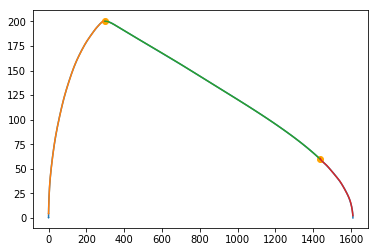

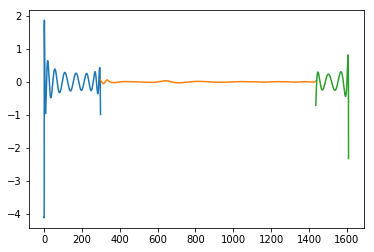

In [138]:

order_of_f = 15

function_one = polyfit(height[:top_index], velocity[:top_index], order_of_f)
function_two = polyfit(height[top_index:near_top], velocity[top_index:near_top], order_of_f)
function_three = polyfit(height[near_top:], velocity[near_top:], order_of_f)

graph_one = []
graph_two = []
graph_three = []

for i in range (0, len(height)):
    graph_one.append(function_value(order_of_f, function_one, height[i]))
    graph_two.append(function_value(order_of_f, function_two, height[i]))
    graph_three.append(function_value(order_of_f, function_three, height[i]))
    
figure()

plot (height, velocity)
plot (height[top_index], velocity[top_index], 'o', color = 'orange')
plot (height[near_top], velocity[near_top], 'o', color = 'orange')
plot (height[:top_index], graph_one[:top_index])
plot (height[top_index:near_top], graph_two[top_index:near_top])
plot (height[near_top:], graph_three[near_top:])


#plot the difference between the model and the line of best fit
figure()

difference_one = array(velocity)-array(graph_one)
difference_two = array(velocity)-array(graph_two)
difference_three = array(velocity)-array(graph_three)
plot (height[:top_index], difference_one[:top_index])
plot (height[top_index:near_top], difference_two[top_index:near_top])
plot (height[near_top:], difference_three[near_top:])




So fitting lines seems to be too computational. But we will have to do this unles if we can get a simple interpolator going. The full arrays take up about 140 kilobytes which I think is too much, so I will try to choose more scarce data points in the begining when the motor is burning and during the main coast phase where the graph is mainly flat, and then a lot of data points towards the end where the graph is changing steepness

236


(1431.5235253316478, 1614.3371423814381)

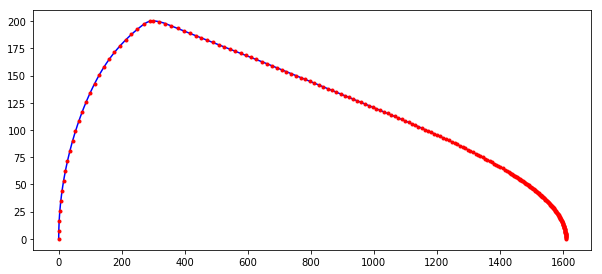

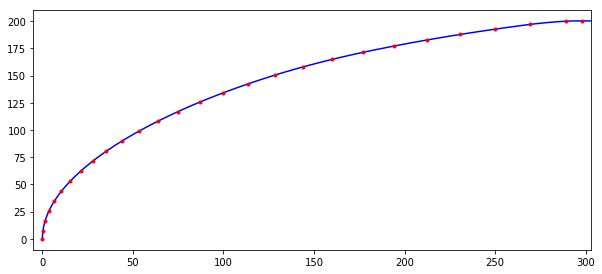

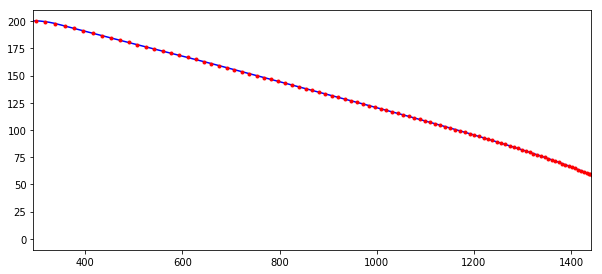

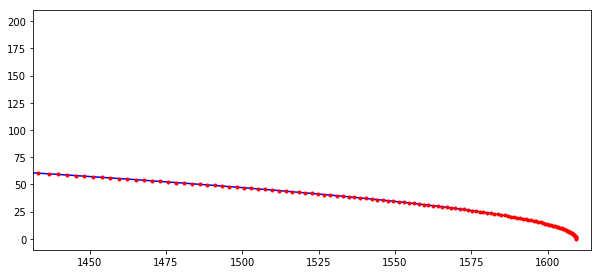

In [157]:
burn_phase_scatter = 100
first_coast_phase_scatter = 100
final_phase_scatter = 50
print len(height[:top_index])/burn_phase_scatter + len(height[top_index:near_top])/first_coast_phase_scatter + len(height[near_top:])/final_phase_scatter

#make a new arrays with scarced data
new_height_arr = []
new_vel_arr = []
for index in range (0, len(height[:top_index])):
    if index%burn_phase_scatter == 0:
        new_height_arr.append(height[index])
        new_vel_arr.append(velocity[index])
for index in range (0, near_top-top_index):
    if index%first_coast_phase_scatter == 0:
        new_height_arr.append(height[index+top_index])
        new_vel_arr.append(velocity[index+top_index])
for index in range (0, len(height)-near_top):
    if index%final_phase_scatter == 0:
        new_height_arr.append(height[index+near_top])
        new_vel_arr.append(velocity[index+near_top])
        
figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')

figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')
xlim(-5,height[top_index]+5)

figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')
xlim(height[top_index]-5,height[near_top]+5)

figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')
xlim(height[near_top]-5,height[-1]+5)
